In [10]:
import pandas as pd
import numpy as np

In [11]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [12]:
Y_train = train.iloc[:,0]
Y_train = pd.DataFrame(Y_train).to_numpy()
Y_train = Y_train.reshape(60000)
X_train = train.iloc[:,1:785]
X_train = pd.DataFrame(X_train).to_numpy()
Y_test = test.iloc[:,0]
Y_test = pd.DataFrame(Y_test).to_numpy()
Y_test = Y_test.reshape(10000)
X_test = test.iloc[:,1:785]
X_test = pd.DataFrame(X_test).to_numpy()

In [13]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [14]:
X_train = X_train/255
X_test = X_test/255

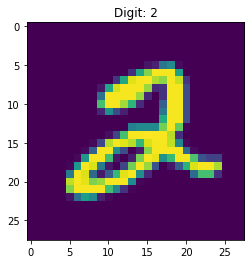

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_number(indeks):
    """Show number using matplotlib, indeks should be in range 0 - 59999"""
    plt.imshow(X_train[indeks])
    plt.title("Digit: " + str(Y_train[indeks]))
    plt.show()
    
show_number(5)

In [16]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [9]:
def examine_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train,Y_train)
    accuracy = model.score(X_test, Y_test)
    return accuracy

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
accuracy = examine_model(LogisticRegression(max_iter=1000), X_train, Y_train, X_test, Y_test)
print("Logistic regression:")
print(accuracy)

Logistic regression:
0.9255


In [12]:
accuracy = examine_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)
print("Random Forest Classifier:")
print(accuracy)

Random Forest Classifier:
0.9708


In [13]:
accuracy = examine_model(KNeighborsClassifier(),X_train, Y_train, X_test, Y_test)
print("K-Neighbors Classifier:")
print(accuracy)

K-Neighbors Classifier:
0.9688


In [14]:
accuracy = examine_model(LogisticRegression(max_iter=1500), X_train, Y_train, X_test, Y_test)
print("Logistic regression:")
print(accuracy)

Logistic regression:
0.9259


/home/venky/ML/ML_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn import svm

In [16]:
accuracy = examine_model(svm.SVC(kernel='linear'), X_train, Y_train, X_test, Y_test)
print("SVM regression:")
print(accuracy)

SVM regression:
0.9404


In [20]:
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model
from keras.layers import Dropout

(784,)
Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3231 - accuracy: 0.9017 - val_loss: 0.1661 - val_accuracy: 0.9510
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1300 - accuracy: 0.9601 - val_loss: 0.1208 - val_accuracy: 0.9639
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0838 - accuracy: 0.9736 - val_loss: 0.0915 - val_accuracy: 0.9728
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0591 - accuracy: 0.9805 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 0.9786
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0737 -

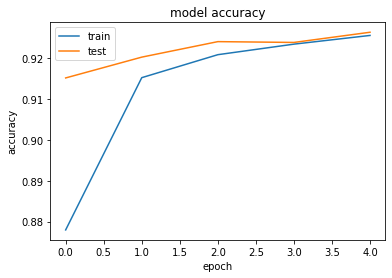

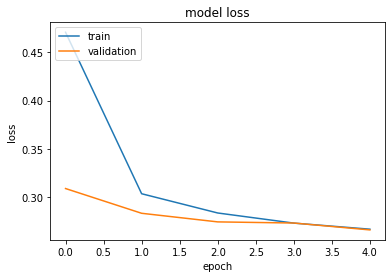

In [21]:
def two_layers_sigmoid(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="sigmoid", name="first")(X_input)
    X = Dense(784, activation="sigmoid", name="second")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_sigmoid(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)

print(nn_predictions) #two layer sigmoid epoch 30
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1799 - accuracy: 0.9449 - val_loss: 0.1099 - val_accuracy: 0.9646
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0967 - val_accuracy: 0.9715
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0769 - val_accuracy: 0.9800
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0725 - val_accuracy: 0.9817
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0867 - val_accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0905 -

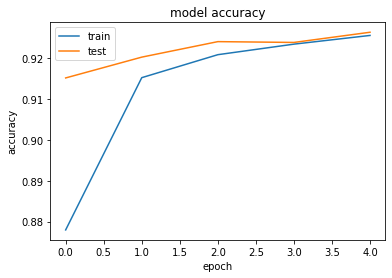

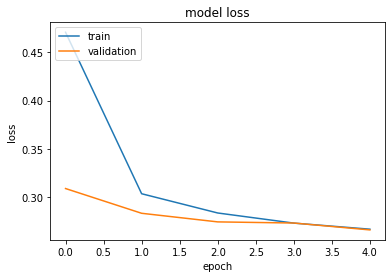

In [22]:
def two_layers_relu_20(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = Dense(784, activation="relu", name="second")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_relu_20(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)

print(nn_predictions) #two layer relu epoch 20
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2155 - accuracy: 0.9364 - val_loss: 0.1279 - val_accuracy: 0.9614
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9733 - val_loss: 0.1128 - val_accuracy: 0.9630
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0759 - val_accuracy: 0.9782
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0628 - val_accuracy: 0.9819
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0744 - val_ac

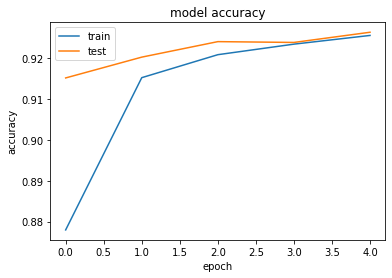

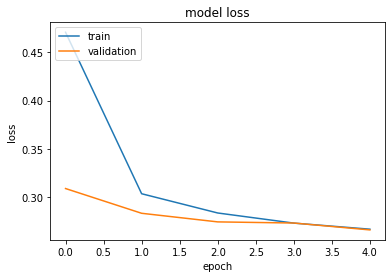

In [23]:
def two_layers_relu_diff(input_shape):
    X_input = Input(input_shape)
    X = Dense(256, activation="relu", name="first")(X_input)
    X = Dense(64, activation="relu", name="second")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_relu_diff(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch diff neurons
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2127 - accuracy: 0.9351 - val_loss: 0.1076 - val_accuracy: 0.9661
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0924 - accuracy: 0.9711 - val_loss: 0.0984 - val_accuracy: 0.9699
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0869 - val_accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0853 - val_accuracy: 0.9770
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0818 - val_ac

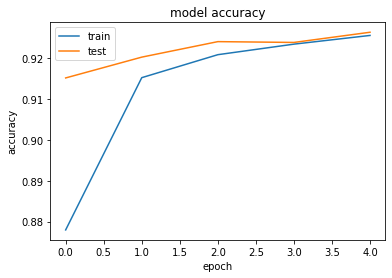

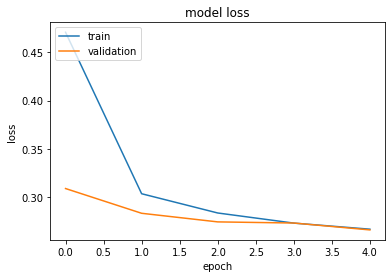

In [24]:
def three_layers_relu_diff(input_shape):
    X_input = Input(input_shape)
    X = Dense(256, activation="relu", name="first")(X_input)
    X = Dense(256, activation="relu", name="second")(X)
    X = Dense(64, activation="relu", name="third")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = three_layers_relu_diff(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch diff neurons
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
from keras.layers import Dropout

(784,)
Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.9143 - val_loss: 0.1168 - val_accuracy: 0.9671
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1386 - accuracy: 0.9586 - val_loss: 0.1050 - val_accuracy: 0.9677
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9691 - val_loss: 0.0955 - val_accuracy: 0.9715
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9734 - val_loss: 0.0770 - val_accuracy: 0.9778
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.9767 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0718 - val_accuracy: 0.9798
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9817 - val_loss: 0.0667 - val_ac

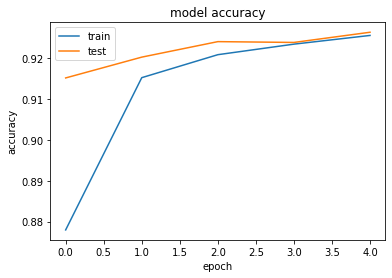

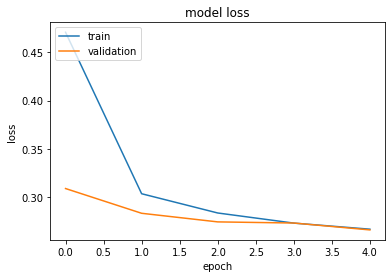

In [26]:
def three_layers_relu_diff_drop(input_shape):
    X_input = Input(input_shape)
    X = Dense(256, activation="relu", name="first")(X_input)
    X = Dropout(0.2)(X)
    X = Dense(256, activation="relu", name="second")(X)
    X = Dropout(0.2)(X)
    X = Dense(64, activation="relu", name="third")(X)
    X = Dropout(0.2)(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = three_layers_relu_diff_drop(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch diff neurons and dropout
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2050 - accuracy: 0.9378 - val_loss: 0.0806 - val_accuracy: 0.9753
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1051 - accuracy: 0.9675 - val_loss: 0.0873 - val_accuracy: 0.9734
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0778 - accuracy: 0.9753 - val_loss: 0.0770 - val_accuracy: 0.9784
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0777 - val_accuracy: 0.9767
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0923 - val_accuracy: 0.9755
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0719 -

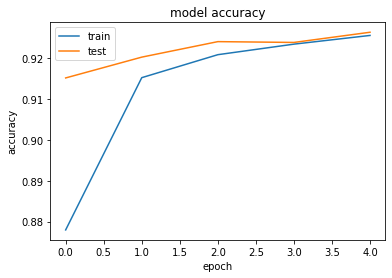

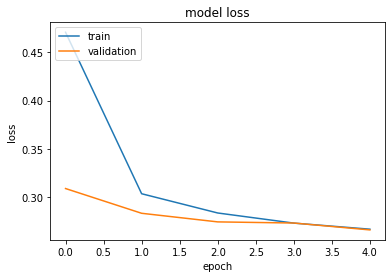

In [27]:
def two_layers_relu_drop(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = Dropout(0.2)(X)
    X = Dense(784, activation="relu", name="second")(X)
    X = Dropout(0.2)(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_relu_drop(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch same neurons dropout
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.savefig("squares.png")

(784,)
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8263 - accuracy: 0.7477 - val_loss: 0.2982 - val_accuracy: 0.9136
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8896 - val_loss: 0.2166 - val_accuracy: 0.9351
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2882 - accuracy: 0.9159 - val_loss: 0.1749 - val_accuracy: 0.9474
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2394 - accuracy: 0.9305 - val_loss: 0.1503 - val_accuracy: 0.9544
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2080 - accuracy: 0.9388 - val_loss: 0.1370 - val_accuracy: 0.9565
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1842 - accuracy: 0.9460 - val_loss: 0.1188 - val_accuracy: 0.9617
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1667 - accuracy: 0.9518 - val_loss: 0.1108 - val_ac

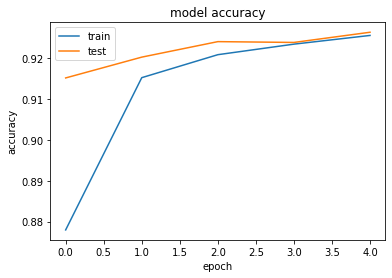

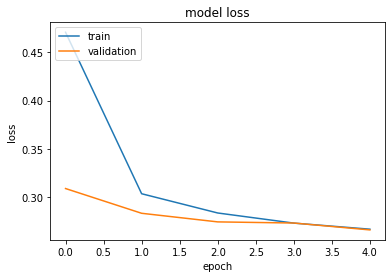

In [28]:
def three_layers_relu_diff_drop(input_shape):
    X_input = Input(input_shape)
    X = Dense(256, activation="relu", name="first")(X_input)
    X = Dropout(0.2)(X)
    X = Dense(256, activation="relu", name="second")(X)
    X = Dropout(0.2)(X)
    X = Dense(64, activation="relu", name="third")(X)
    X = Dropout(0.2)(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = three_layers_relu_diff_drop(X_train.shape[1:])
NN_model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch diff neurons and dropout,opti sgd
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6079 - accuracy: 0.8380 - val_loss: 0.2929 - val_accuracy: 0.9178
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3048 - accuracy: 0.9119 - val_loss: 0.2278 - val_accuracy: 0.9331
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2432 - accuracy: 0.9295 - val_loss: 0.1872 - val_accuracy: 0.9452
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2054 - accuracy: 0.9414 - val_loss: 0.1634 - val_accuracy: 0.9523
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1780 - accuracy: 0.9482 - val_loss: 0.1445 - val_accuracy: 0.9575
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1586 - accuracy: 0.9539 - val_loss: 0.1316 - val_accuracy: 0.9608
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1426 - accuracy: 0.9587 - val_loss: 0.1205 - va

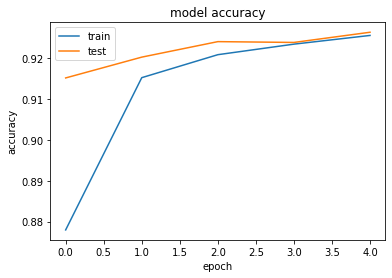

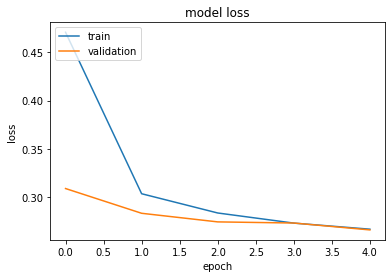

In [29]:
def two_layers_relu_drop(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = Dropout(0.2)(X)
    X = Dense(784, activation="relu", name="second")(X)
    X = Dropout(0.2)(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_relu_drop(X_train.shape[1:])
NN_model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 20, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 20 epoch same neurons dropout, opti SGD
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1992 - accuracy: 0.9405 - val_loss: 0.0960 - val_accuracy: 0.9690
Epoch 2/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0950 - accuracy: 0.9718 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch 3/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0699 - accuracy: 0.9791 - val_loss: 0.1366 - val_accuracy: 0.9642
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.1067 - val_accuracy: 0.9742
Epoch 5/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.0876 - val_accuracy: 0.9775
Epoch 6/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0405 - accuracy: 0.9884 - val_loss: 0.1231 - val_accuracy: 0.9738
Epoch 7/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.1002 -

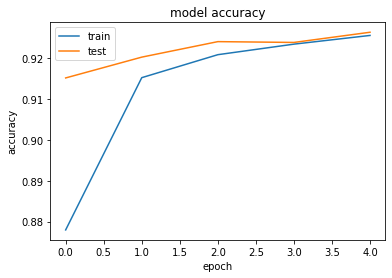

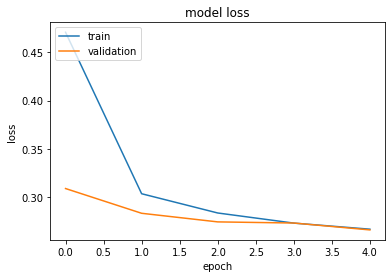

In [30]:
def three_layers_relu(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = Dense(784, activation="relu", name="second")(X)
    X = Dense(784, activation="relu", name="third")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = three_layers_relu(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 30 epoch 3 layer 784x3
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1806 - accuracy: 0.9449 - val_loss: 0.0994 - val_accuracy: 0.9702
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0808 - accuracy: 0.9752 - val_loss: 0.0789 - val_accuracy: 0.9777
Epoch 3/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0722 - val_accuracy: 0.9783
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0828 - val_accuracy: 0.9784
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 6/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0800 - val_accuracy: 0.9806
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0281 - accuracy: 0.9922 - val_loss: 0.1017 -

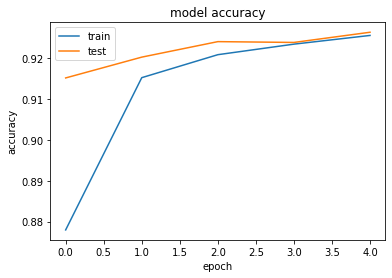

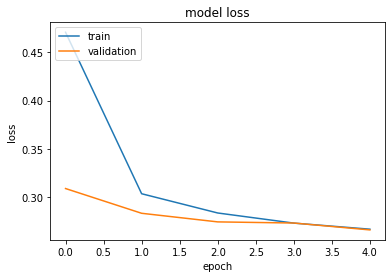

In [32]:
def two_layers_relu(input_shape):
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = Dense(784, activation="relu", name="second")(X)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='Two_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = two_layers_relu(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 30 epoch 2 layer
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9428 - val_loss: 0.1026 - val_accuracy: 0.9688
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9770 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0740 - val_accuracy: 0.9781
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0673 - val_accuracy: 0.9812
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.0676 - val_ac

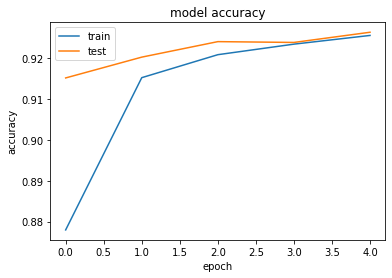

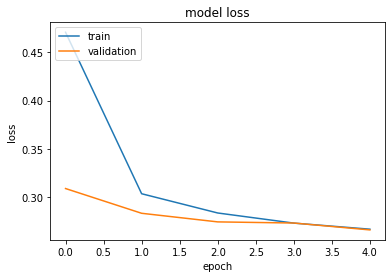

In [33]:
def one_layers_relu(input_shape):
    
    X_input = Input(input_shape)
    X = Dense(784, activation="relu", name="first")(X_input)
    X = X = Dense(10, activation="softmax", name="last")(X)
    
    model = Model(inputs = X_input, outputs = X, name='one_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = one_layers_relu(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)
nn_predictions = NN_model.evaluate(x = X_test, y = Y_test)
print(nn_predictions) # relu 30 epoch one layer 784 hidden units
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(784,)
Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4737 - accuracy: 0.8763 - val_loss: 0.3082 - val_accuracy: 0.9153
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9151 - val_loss: 0.2786 - val_accuracy: 0.9234
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9211 - val_loss: 0.2760 - val_accuracy: 0.9247
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9234 - val_loss: 0.2736 - val_accuracy: 0.9238
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9260 - val_loss: 0.2649 - val_accuracy: 0.9274
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9273 - val_loss: 0.2661 - val_accuracy: 0.9251
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9282 - val_loss: 0.2698 - val_ac

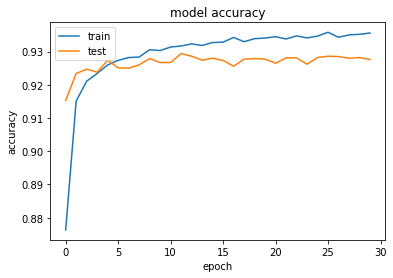

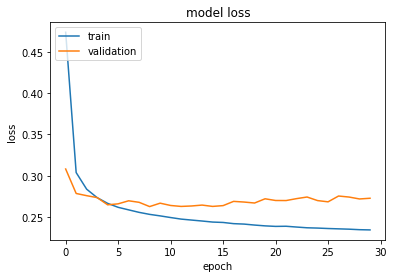

In [34]:
def zero_layers_relu(input_shape):
    X_input = Input(input_shape)
    X = Dense(10, activation="softmax", name="last")(X_input)
    
    model = Model(inputs = X_input, outputs = X, name='zero_hidden_layers')

    return model
print(X_train.shape[1:])
NN_model = zero_layers_relu(X_train.shape[1:])
NN_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = NN_model.fit(x = X_train, y = Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()